In [1]:
from simple_rl import PPO
from simple_rl.ppo import plot
from simple_rl.common.evaluation import evaluate_policy

from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env

In [2]:
env = VecNormalize(make_vec_env('Walker2d-v4', n_envs=1, env_kwargs=dict(render_mode='rgb_array')))

model = PPO(env)
model.train(total_timesteps=1000000, verbose=1)

| 0.2% | policy   +0.28 | value   0.59 | entropy 8.50 | clip 0.16 | std [1.00 1.00 1.00 0.99 0.99 1.02] |
| 0.4% | policy   -0.10 | value   0.77 | entropy 8.48 | clip 0.21 | std [0.98 0.99 1.00 0.98 0.98 1.01] |
| 0.6% | policy   -0.32 | value   0.66 | entropy 8.42 | clip 0.18 | std [0.98 0.99 0.99 0.97 0.95 1.00] |
| 0.8% | policy   -0.40 | value   0.66 | entropy 8.34 | clip 0.21 | std [0.95 0.98 0.98 0.95 0.94 1.00] |
| 1.0% | policy   -0.31 | value   0.77 | entropy 8.24 | clip 0.20 | std [0.93 0.96 0.96 0.94 0.92 0.99] |
| 1.2% | policy   -0.23 | value   0.57 | entropy 8.11 | clip 0.17 | std [0.90 0.95 0.93 0.91 0.89 0.98] |
| 1.4% | policy   -0.36 | value   0.54 | entropy 8.02 | clip 0.12 | std [0.90 0.94 0.91 0.90 0.89 0.98] |
| 1.6% | policy   -0.12 | value   0.33 | entropy 7.97 | clip 0.12 | std [0.89 0.94 0.91 0.89 0.87 0.96] |
| 1.8% | policy   -0.10 | value   0.36 | entropy 7.94 | clip 0.14 | std [0.89 0.92 0.90 0.88 0.88 0.96] |
| 2.0% | policy   -0.10 | value   0.30 | entro

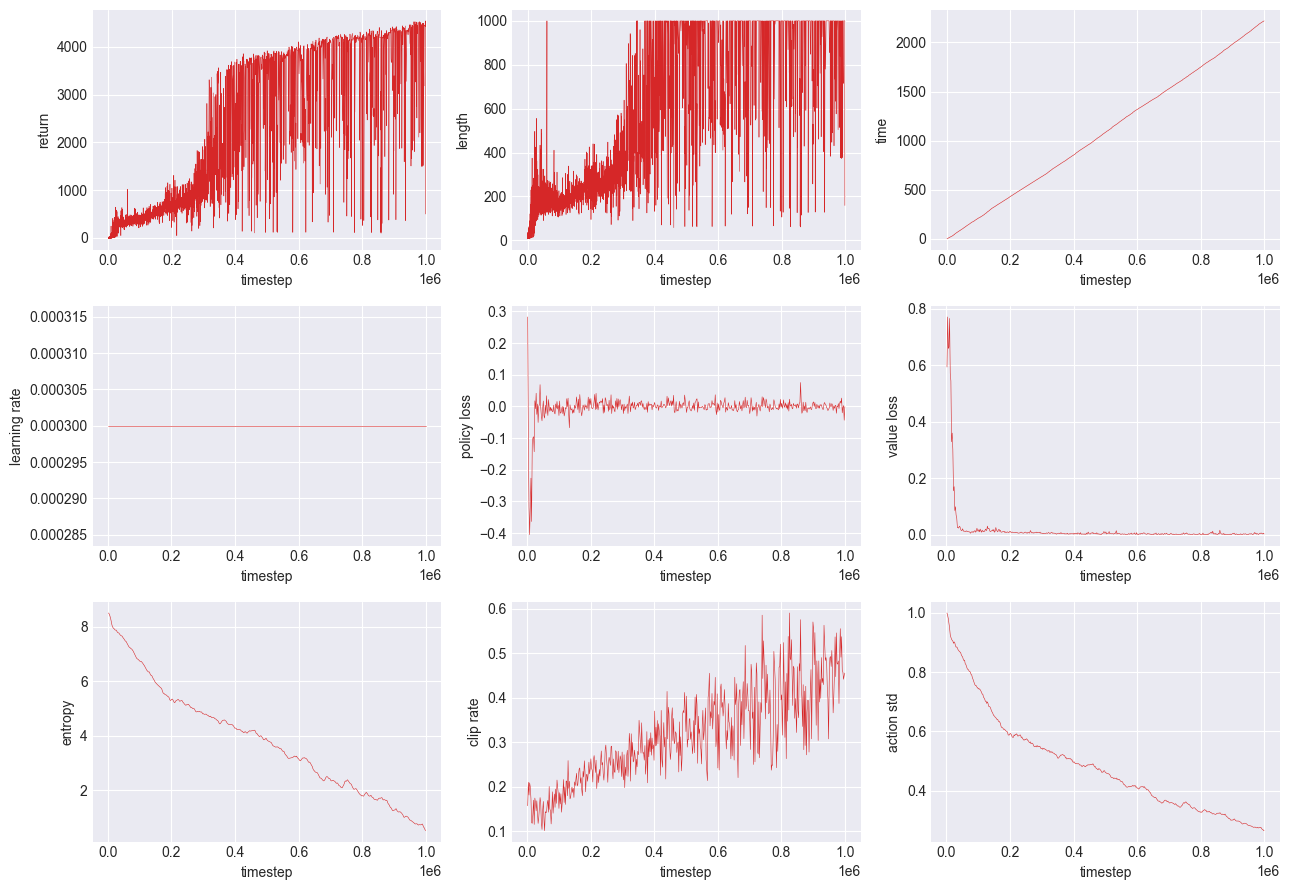

In [3]:
plot(model.logger)

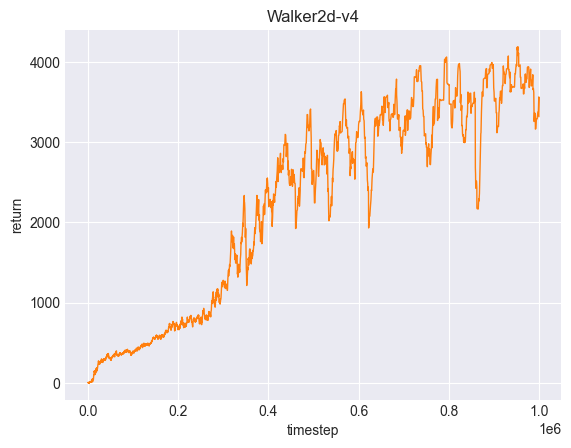

In [4]:
import matplotlib.pyplot as plt

x, y = model.logger.get('episode/r', window=16)

plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(x, y, color='tab:orange', linewidth=1.0)
plt.title('Walker2d-v4')
plt.xlabel('timestep')
plt.ylabel('return')
plt.show()

In [5]:
env.training = False
env.norm_reward = False

mean_d, std_d = evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=64,
    deterministic=True
)
mean_s, std_s = evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=64,
    deterministic=False
)

print('| deterministic policy | mean %6.1f | std: %5.1f |'%(mean_d, std_d))
print('| stochastic    policy | mean %6.1f | std: %5.1f |'%(mean_s, std_s))

| deterministic policy | mean 4474.7 | std:  38.8 |
| stochastic    policy | mean 3973.8 | std: 1089.8 |


In [6]:
from stable_baselines3.common.vec_env import VecVideoRecorder

env = VecVideoRecorder(
    venv=env,
    video_folder='./videos/',
    record_video_trigger=lambda x: x==0,
    video_length=1000,
    name_prefix='Walker-ppo'
)

evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=1,
    deterministic=True
)

env.close()

Saving video to c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Walker-ppo-step-0-to-step-1000.mp4
Moviepy - Building video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Walker-ppo-step-0-to-step-1000.mp4.
Moviepy - Writing video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Walker-ppo-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Walker-ppo-step-0-to-step-1000.mp4
